# RULE BASED SENTIMENT ANALYSIS ON VICTORIAN POETRY AND OTHER LINGUISTICS ANALYSIS

### Project Overview:

The project aims to perform sentiment analysis and stylometric analysis on a dataset of Victorian poetry. Sentiment analysis helps in understanding the emotional tone of the poems, while stylometric analysis provides insights into the linguistic style and characteristics of the poets from different eras. The significance of this project lies in exploring the intersection of natural language processing (NLP) techniques with literary analysis, shedding light on how sentiment and stylistic features manifest in poetry.

OBJECTIVES:

1.Considering the ample number of works written during the Victorian era and also taking the time, resource constraints for the project, decide the poems and size of data to work on.

2.Choose significant poems covering key poets and richness in language and themes from Early, Mid and Late Victorian Era.
3.Collect data of poem through web scraping and create a dataset.

4.Perform data processing and cleaning the data to make it suitable for analysis.

5.Perform  Sentiment analysis and stylometric analysis using Natural Language Processing Teechniques(NLP)




In [5]:
!pip install nltk

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.corpus import stopwords
import collections
from collections import Counter
import string
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


# DATA

For the analysis, a comprehensive collection of Victorian Era poems were selected. It consists both famous and lesser known poems from Early Victorian Era(1830s-1850s), Mid- Victorian Era(1850s-1870s) and Late Victorian Era(1870s-1900s). The data acquisition process involved searching for public-domain poems available from digital libraries and literary websites. Then scraped the required data from the website. Extra effort was made to ensure the data's accuracy and completeness. The dataset was then structured to a format suitable for data programming and analysis.

#### Poems chosen:
Fifteen poems which inclued five different poems each from time periods(early, mid, late) within the era were chosen because, otherwise it would be become difficult to analyse and explore each poem in depth as a lot of poems were published during the Victorian era. With prior knowledge, then with further research and reading, I carefully chose fifteen significant poems which would be suitable for the analysis.

POEMS CHOSEN:

My Last Duchess by Robert Browning

The Raven by Edgar Allan Poe

The Charge of the Light Brigade by Alfred Lord Tennyson

The Cry of the Children by Elizabeth Barret Browning

Goblin Market by Christina Rosetti

Dover Beach by Matthew Arnold

Jabberwocky by Lewis Carroll

The Ballad of Reading Gaol by Oscar Wilde

Porphyria’s Lover by Robert Browning

The Darkling Thrush by Thomas Hardy

The Love Song of J Alfred Prufrock by T S Eliot

The Man He Killed by Thomas Hardy

The Second Coming by W B Yeats

The Wind Hover by Gerard Manley Hopkins

To an Athlete Dying Young by A E Housman


### LIMITATIONS AND CONSTRAINTS OF DATA
As the dataset includes fifteen poems from Victorian Era, it might be limited to generalize the findings and may not completely reflect the broad range of poetry published in the era.
Though, I tried to include poems from various poets and taking the linguistic, stylistic features into consideration, the dataset may still be found relatively small. So, the complete analysis of styles,themes,sentiment ofpoetry from the era may be limited.
As my major focus in the project is the linguistic and sentiment analysis, the exploration of biographical, cultural and social context of the poems may not be full reflected. A much comprehensive analysis may be required for addressing this limitation.
With the time and other constraints,the complete analysis of the poetry of Victorian era is limited. So, the results must be analysed taking this into consideration.

### ETHICAL CONSIDERATIONS
I scraped the poem content for my Dataset from the website of Poetry Foundation. The website allows accessing the copyrighted material available on the website for personal use provided you abide by the terms of use.

All of the content featured or displayed on or through the Services, including without limitation text, graphics, photographs, still images, moving images, videos, sound, illustrations, and software (collectively, “Content”), is owned by TPF, its licensors, vendors, agents, and/or content providers, as applicable. All elements of the Services, including without limitation the general design and the Content, are protected by trade dress, copyright, moral rights, trademark and other laws relating to intellectual property rights. TPF reserves the right to track the usage of Content.

I acknowledge that I do not acquire any ownership rights by accessing and using the copyrighted material.

In using Content in accordance with this Agreement,I do not state or imply that TPF is endorsing me, my viewpoints or any of the products or services that I may provide, or represent that I have a relationship with TPF or any of the events, products or services that TPF provides.

## WEB SCRAPING

I am web scraping my content from a single website. I have collected all the required URL where my required informations are available. All the URL has same HTML structure, hence I am manually entering all the URL into my code for webscraping. For that purpose, I.m defining a list to store the URL of 15 Poems.

In [ ]:
import requests
from bs4 import BeautifulSoup

#As there is a need to scrape 15 poems from a website, defining a list of URLs of the 15 poems

poem_urls = ["https://www.poetryfoundation.org/poems/43768/my-last-duchess",
    "https://www.poetryfoundation.org/poems/48860/the-raven",
    "https://www.poetryfoundation.org/poems/45319/the-charge-of-the-light-brigade",
    "https://www.poetryfoundation.org/poems/43725/the-cry-of-the-children",
    "https://www.poetryfoundation.org/poems/44996/goblin-market",
    "https://www.poetryfoundation.org/poems/43588/dover-beach",
    "https://www.poetryfoundation.org/poems/42916/jabberwocky",
    "https://www.poetryfoundation.org/poems/45495/the-ballad-of-reading-gaol",
    "https://www.poetryfoundation.org/poems/46313/porphyrias-lover",
    "https://www.poetryfoundation.org/poems/44325/the-darkling-thrush",
    "https://www.poetryfoundation.org/poetrymagazine/poems/44212/the-love-song-of-j-alfred-prufrock",
    "https://www.poetryfoundation.org/poems/44329/the-man-he-killed",
    "https://www.poetryfoundation.org/poems/43290/the-second-coming",
    "https://www.poetryfoundation.org/poems/44402/the-windhover",
    "https://www.poetryfoundation.org/poems/46452/to-an-athlete-dying-young",
]

### Extracting the information
As there are long texts of 15 poems, I'm initializing a list to store all of them. Then, I'm Sending an HTTP GET request to the URL and also Checking if the request was successful. Using BeautifulSoup, I Parsed the HTML content of the response. Then, with the HTML element containing the poem text, tried extracting the text of the poem and separating lines with newlines

In [7]:
# Now as there are long texts of 15 poems,again initializing a list to store all of them
poems = []

for url in poem_urls:  # iterating through the URLs
    
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        
        poem_info = soup.find('div',class_='o-poem',attrs={'data-view':'PoemView'})
        
        poem = poem_info.get_text(separator="\n")
        
        poems.append(poem) # Appending the poem to the list of poems

## Data Processing
As a poem is structured differentely,I thought it would be better to process it before creating a dataframe. Hence, I'm performing a basic cleaning on the text of each poem by removing punctuations, whitespaces and also converting it to lowercase. For the purpose of it, I am defining a function and then creating a list to store all the fifteen cleaned poems together.

In [8]:
# As a part of cleaning the text, removing punctuations, whitespace and coverting it to lowercase

import string
def clean_text(poem):    #Defining a function to do it
    
    #Punctuation Removal
    translator = str.maketrans('','', string.punctuation + '“”‘’"\'—')
    cleaned_txt = poem.translate(translator)
    
    #Whitespace Removal
    cleaned_txt = ' '.join(cleaned_txt.split())
    
    #converting to lowercase
    cleaned_txt = cleaned_txt.lower()
    
    return cleaned_txt

# Again creating a list to store the cleaned poems
cleanedpoems = []

for poem_text in poems:
    
    cleaned_poem = clean_text(poem_text)
    
    cleanedpoems.append(cleaned_poem)


In [11]:
# Printing the cleaned text to check for further analysis

for i, poem in enumerate(cleanedpoems, start=1): #Using loop to print with separate numbered titles for each poem 
    
    print(f"Poem {i}:{poem}\n")

Poem 1:ferrara thats my last duchess painted on the wall looking as if she were alive i call that piece a wonder now fra pandolfs hands worked busily a day and there she stands willt please you sit and look at her i said fra pandolf by design for never read strangers like you that pictured countenance the depth and passion of its earnest glance but to myself they turned since none puts by the curtain i have drawn for you but i and seemed as they would ask me if they durst how such a glance came there so not the first are you to turn and ask thus sir twas not her husbands presence only called that spot of joy into the duchess cheek perhaps fra pandolf chanced to say her mantle laps over my ladys wrist too much or paint must never hope to reproduce the faint halfflush that dies along her throat such stuff was courtesy she thought and cause enough for calling up that spot of joy she had a hearthow shall i say too soon made glad too easily impressed she liked whateer she looked on and her 

While checking the text and cross checking it for accuracy, I found an unknown word in the data, hence removing it.

In [12]:
# Found an unknown word "ferrara" in the text, hence removing it

Cleaned_Poems = [] #defining list to store text after removal

for poem_text in cleanedpoems:
    Cleaned_Poem = poem_text.replace("ferrara", '')
    
    Cleaned_Poems.append(Cleaned_Poem)

## DATAFRAME
Now that I have my cleaned text, I am creating a dataframe which consists the Poem Titles, Poet names, era and Poem Text to save all my scraped data and other required datas. I'm manually entering the data for poem title, poet name, era after verifying it from the same website as all the fifteen poems were individually chosen.

In [13]:
# Creating a dataframe with Poem title, Poet name, era and poem text
import pandas as pd

data = {"Era": [
        "Early Victorian Era",
        "Early Victorian Era",           # Manually entering details as its 15 poems manually chosen after reading by myself
        "Early Victorian Era",
        "Early Victorian Era",
        "Early Victorian Era",
        "Mid Victorian Era",
        "Mid Victorian Era",
        "Mid Victorian Era",
        "Mid Victorian Era",
        "Mid Victorian Era",
        "Late Victorian Era",
        "Late Victorian Era",
        "Late Victorian Era",
        "Late Victorian Era",
        "Late Victorian Era",
    ],
    "Title": [
        "My Last Duchess",
        "The Raven",
        "The Charge of the Light Brigade",
        "The Cry of the Children",
        "Goblin Market",
        "Dover Beach",
        "Jabberwocky",
        "The Ballad of Reading Gaol",
        "Porphyria’s Lover",
        "The Darkling Thrush",
        "The Love Song of J Alfred Prufrock",
        "The Man He Killed",
        "The Second Coming",
        "The Wind Hover",
        "To an Athlete Dying Young"
    ],
    "Poet": [
        "Robert Browning",
        "Edgar Allan Poe",
        "Alfred Lord Tennyson",
        "Elizabeth Barret Browning",
        "Christina Rosetti",
        "Matthew Arnold",
        "Lewis Carroll",
        "Oscar Wilde",
        "Robert Browning",
        "Thomas Hardy",
        "T S Eliot",
        "Thomas Hardy",
        "W B Yeats",
        "Gerard Manley Hopkins",
        "A E Housman"
    ],
        "Poem": Cleaned_Poems
}
df = pd.DataFrame(data)  

In [14]:
# Calculating the word length of each poem and adding it to dataframe

length = [len(poem.split()) for poem in df['Poem']]

df['Poem Length'] = length


#### Saving dataset to CSV File
To ensure data persistence and replicable results, I'm saving my dataframe into a CSV file

In [15]:
# Saving the dataframe to a csv file
df.to_csv('project_dataset.csv', index=False)

In [16]:
df = pd.read_csv('project_dataset.csv')

## Data Processing
Some analysis may require data in its original form with stop words to explore language style and emotions in them as well as without stop words. So, as part of data processing, now I'm doing lemmatization and removal of stop words.

### Stop Words Removal
I'm removing stop words from my poem data using nltk. For the purpose, I'm defining a function and applying it to my Poem in the dataset. And to store the poems with stop words removed, I'm also creating a new column to the existing dataset.

In [17]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

set_stop_words = set(stopwords.words('english'))

def stop_words(text):  # defining a function
    
    words = text.split()
    
    words_filtered = [word for word in words if word.lower() not in set_stop_words]
    
    return words_filtered

df['stopwords removed'] = df['Poem'].apply(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Unique and Common words

### Unique words
To gain some insight into the vocabulary richness and writing style of poets, I'm calculating the number of unique words in each poem. By doing so, I can compare the poems for their complexity and diversity in vocabulary, language and style.

Using a for loop to iterate through the rows of dataframe and extract the title and content of poem from which the stopwords wrere already removed. As I have stored the text as list already in the dataframe, I'm directly using it and converting it to set to remove the duplicates.

In [18]:
for index, row in df.iterrows():
    
    poem_title = row['Title']
    
    poem_text = row['stopwords removed']
    
    no_of_uniquewords = len(set(poem_text))
    
    print(f"{poem_title}- Number of unique words:{no_of_uniquewords}\n")

My Last Duchess- Number of unique words:197

The Raven- Number of unique words:369

The Charge of the Light Brigade- Number of unique words:79

The Cry of the Children- Number of unique words:410

Goblin Market- Number of unique words:1044

Dover Beach- Number of unique words:123

Jabberwocky- Number of unique words:70

The Ballad of Reading Gaol- Number of unique words:1051

Porphyria’s Lover- Number of unique words:175

The Darkling Thrush- Number of unique words:94

The Love Song of J Alfred Prufrock- Number of unique words:368

The Man He Killed- Number of unique words:45

The Second Coming- Number of unique words:83

The Wind Hover- Number of unique words:148

To an Athlete Dying Young- Number of unique words:84



#### Common words
To gain insight into the poetry, I'm finding the common words in each poem.
I'm importing the counter class from collections module to count the frequency of words in my data.Also, defining a list to store the words in which the Counter object counts the frequency of all words.

In [19]:
from collections import Counter

Words = [word for words_list in df['stopwords removed'] for word in words_list]   #list to store all words

commonwords = 200  #finding 200 most common words

frequency = Counter(Words)   #creating dictionary and using counter class to count frequency of each word

common_words = frequency.most_common(commonwords) # using most_common method that returns a list of tuples that contains word and its frequency.

print(common_words)

[('one', 65), ('like', 64), ('man', 44), ('upon', 42), ('day', 39), ('us', 36), ('come', 36), ('men', 35), ('would', 29), ('buy', 27), ('laura', 27), ('never', 26), ('night', 26), ('heart', 25), ('little', 25), ('lizzie', 24), ('said', 23), ('time', 23), ('look', 22), ('say', 22), ('let', 21), ('still', 21), ('eyes', 21), ('head', 21), ('long', 20), ('word', 20), ('door', 19), ('round', 18), ('soul', 18), ('thing', 18), ('made', 17), ('children', 17), ('goblin', 17), ('though', 16), ('hands', 15), ('heard', 15), ('back', 15), ('wind', 15), ('hear', 15), ('air', 15), ('young', 15), ('may', 15), ('dead', 15), ('went', 14), ('white', 14), ('go', 14), ('yet', 14), ('till', 14), ('light', 14), ('old', 14), ('could', 14), ('face', 14), ('came', 13), ('must', 13), ('without', 13), ('see', 13), ('bird', 13), ('death', 13), ('knew', 13), ('red', 13), ('know', 12), ('chamber', 12), ('mouth', 12), ('world', 12), ('love', 12), ('fruits', 12), ('full', 12), ('hair', 12), ('every', 12), ('last', 11)

##  Lemmatization

Performing Lemmatization may help to improve the accuracy of analysing the texts of poem by reducing redundancy in my data and thus reduce the variations of same words. 
I want to explore thesentiments and other stylistic feaures in the data, so lemmatization helps in retaining semantic word meanings and helps in exploring poems with similar themes.
Thus, also making it more suitable for similarity and comparative analysis of different poems and their poets. 

I'm importing WordNetLemmatizer from nltk and initializing it and then defining a function to lemmatize my list of words in stopwords removed column in the dataframe. Also, I'm storing the lemmatized poems into a list.


In [20]:
import nltk
from nltk.stem import WordNetLemmatizer

Lemmatize = WordNetLemmatizer()

def words_lemmatization(words):  # defining function
    
    lemmatizedwords = [Lemmatize.lemmatize(word) for word in words]
    
    return lemmatizedwords

lemmatizedpoems = df['stopwords removed'].apply(words_lemmatization)

lemmatized_list = lemmatizedpoems.tolist()  # storing to a list

# SENTIMENT ANALYSIS

I did the Implementation of sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer from the NLTK library.

1. Initialization: Initially, it downloads the VADER lexicon and initializes the SentimentIntensityAnalyzer object.

2. Sentiment Analysis:It iterates through each poem in the lemmatized_list, which contains preprocessed poems. For each poem, it joins the lemmatized words back into a single string. Then, it calculates sentiment scores using the polarity_scores method of the VADER analyzer, which returns a dictionary containing scores for positive, negative, neutral, and compound sentiments.

3. Data Integration: The sentiment scores for each poem are appended to the sentiment_scores list.

4. DataFrame Update: Finally, the sentiment scores are added to the original DataFrame (df) under the column 'Sentiment Scores'.

This enables the analysis of sentiment in Victorian poetry, providing insights into the emotional tone of each poem, which can be valuable for literary analysis and understanding the sentiments conveyed by the poets.

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon 
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each poem
sentiment_scores = []

for poem in lemmatized_list:
    poem_text = ' '.join(poem)  # Joining the lemmatized words back into a single string
    # Analyzing sentiment for the poem text
    sentiment_score = sid.polarity_scores(poem_text)
    sentiment_scores.append(sentiment_score)

# Adding sentiment scores to DataFrame
df['Sentiment Scores'] = sentiment_scores

# Displaying the DataFrame with sentiment scores
print(df[['Title', 'Sentiment Scores']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


                                 Title  \
0                      My Last Duchess   
1                            The Raven   
2      The Charge of the Light Brigade   
3              The Cry of the Children   
4                        Goblin Market   
5                          Dover Beach   
6                          Jabberwocky   
7           The Ballad of Reading Gaol   
8                    Porphyria’s Lover   
9                  The Darkling Thrush   
10  The Love Song of J Alfred Prufrock   
11                   The Man He Killed   
12                   The Second Coming   
13                      The Wind Hover   
14           To an Athlete Dying Young   

                                     Sentiment Scores  
0   {'neg': 0.109, 'neu': 0.671, 'pos': 0.22, 'com...  
1   {'neg': 0.162, 'neu': 0.705, 'pos': 0.133, 'co...  
2   {'neg': 0.247, 'neu': 0.623, 'pos': 0.13, 'com...  
3   {'neg': 0.205, 'neu': 0.617, 'pos': 0.178, 'co...  
4   {'neg': 0.115, 'neu': 0.727, 'pos': 0.158, 

In [22]:
df

,Era,Title,Poet,Poem,Poem Length,stopwords removed,Sentiment Scores
0,Early Victorian Era,My Last Duchess,Robert Browning,thats my last duchess painted on the wall loo...,446,"[thats, last, duchess, painted, wall, looking,...","{'neg': 0.109, 'neu': 0.671, 'pos': 0.22, 'com..."
1,Early Victorian Era,The Raven,Edgar Allan Poe,once upon a midnight dreary while i pondered w...,1068,"[upon, midnight, dreary, pondered, weak, weary...","{'neg': 0.162, 'neu': 0.705, 'pos': 0.133, 'co..."
2,Early Victorian Era,The Charge of the Light Brigade,Alfred Lord Tennyson,i half a league half a league half a league on...,266,"[half, league, half, league, half, league, onw...","{'neg': 0.247, 'neu': 0.623, 'pos': 0.13, 'com..."
3,Early Victorian Era,The Cry of the Children,Elizabeth Barret Browning,pheu pheu ti prosderkesthe m ommasin tekna ala...,1262,"[pheu, pheu, ti, prosderkesthe, ommasin, tekna...","{'neg': 0.205, 'neu': 0.617, 'pos': 0.178, 'co..."
4,Early Victorian Era,Goblin Market,Christina Rosetti,morning and evening maids heard the goblins cr...,3042,"[morning, evening, maids, heard, goblins, cry,...","{'neg': 0.115, 'neu': 0.727, 'pos': 0.158, 'co..."
5,Mid Victorian Era,Dover Beach,Matthew Arnold,the sea is calm tonight the tide is full the m...,258,"[sea, calm, tonight, tide, full, moon, lies, f...","{'neg': 0.157, 'neu': 0.608, 'pos': 0.235, 'co..."
6,Mid Victorian Era,Jabberwocky,Lewis Carroll,twas brillig and the slithy toves did gyre and...,166,"[twas, brillig, slithy, toves, gyre, gimble, w...","{'neg': 0.07, 'neu': 0.861, 'pos': 0.068, 'com..."
7,Mid Victorian Era,The Ballad of Reading Gaol,Oscar Wilde,i he did not wear his scarlet coat for blood a...,4076,"[wear, scarlet, coat, blood, wine, red, blood,...","{'neg': 0.262, 'neu': 0.592, 'pos': 0.146, 'co..."
8,Mid Victorian Era,Porphyria’s Lover,Robert Browning,the rain set early in tonight the sullen wind ...,409,"[rain, set, early, tonight, sullen, wind, soon...","{'neg': 0.115, 'neu': 0.583, 'pos': 0.301, 'co..."
9,Mid Victorian Era,The Darkling Thrush,Thomas Hardy,i leant upon a coppice gate when frost was spe...,160,"[leant, upon, coppice, gate, frost, spectregre...","{'neg': 0.184, 'neu': 0.634, 'pos': 0.182, 'co..."


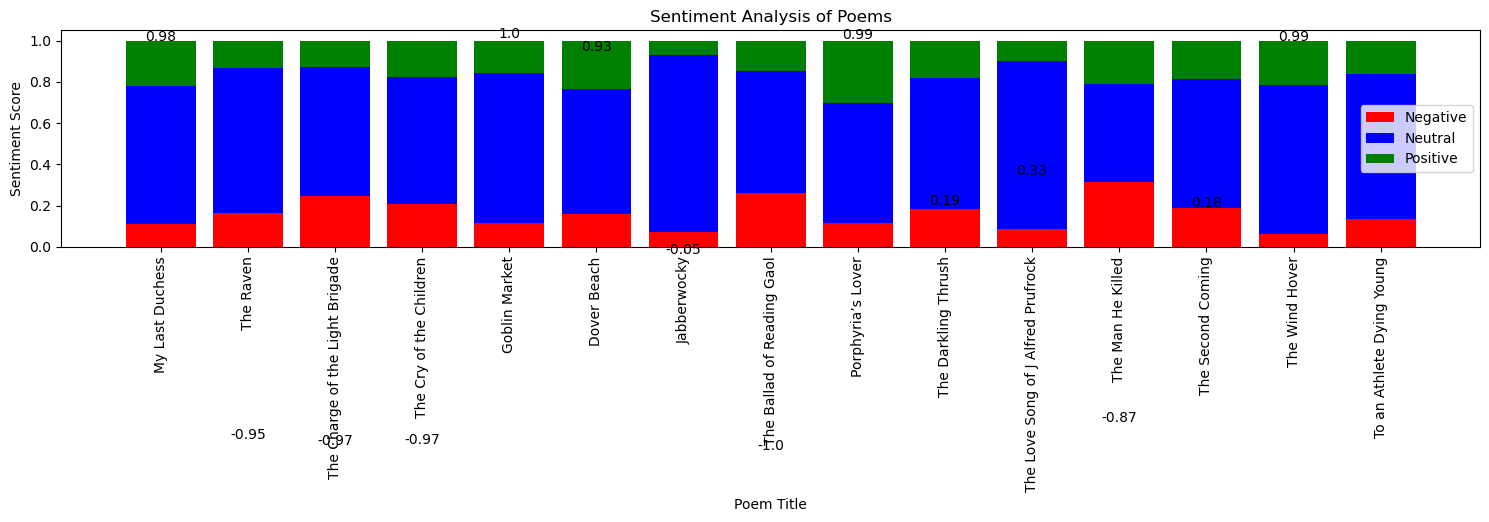

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting sentiment scores
neg_scores = [score['neg'] for score in sentiment_scores]
neu_scores = [score['neu'] for score in sentiment_scores]
pos_scores = [score['pos'] for score in sentiment_scores]
compound_scores = [score['compound'] for score in sentiment_scores]

# Plotting the sentiment scores
plt.figure(figsize=(15, 10))

# Plotting negative sentiment scores
plt.bar(df['Title'], neg_scores, color='red', label='Negative')

# Plotting neutral sentiment scores
plt.bar(df['Title'], neu_scores, bottom=neg_scores, color='blue', label='Neutral')

# Plotting positive sentiment scores
plt.bar(df['Title'], pos_scores, bottom=[sum(x) for x in zip(neg_scores, neu_scores)], color='green', label='Positive')

# Adding compound sentiment scores as text above the bars
for i in range(len(df['Title'])):
    plt.text(i, compound_scores[i], str(round(compound_scores[i], 2)), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Poem Title')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Poems')
plt.xticks(rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## POS TAGGING
To perform more analysis, I utilized the SpaCy library to perform Part-of-Speech (POS) tagging on each poem in the dataset. 

I loaded the English language model using `spacy.load("en_core_web_sm")`, which provides linguistic annotations for text processing. It iterates over each lemmatized poem in the `lemmatized_list`. For each poem, it joins the lemmatized words back into a single string. Then, it processes the poem text using SpaCy's `nlp` object, which tokenizes the text and assigns POS tags to each token. After processing the poem with SpaCy, it extracts the POS tags for each token and stores them as tuples of (word, POS tag). The extracted POS tagged poems are appended to the `pos_tagged_poems` list. Finally, the POS tagged poems are added as a new column named 'POS Tagged Poems' to the existing DataFrame `df`.


In [34]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Perform POS tagging on each poem
pos_tagged_poems = []

for poem in lemmatized_list:
    # Joining the lemmatized words back into a single string
    poem_text = ' '.join(poem)
    
    # Process the poem text with SpaCy
    doc = nlp(poem_text)
    
    # Extract POS tags and store them as tuples of (word, POS tag)
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    pos_tagged_poems.append(pos_tags)

# Add POS tagged poems to DataFrame
df['POS Tagged Poems'] = pos_tagged_poems

# Display the DataFrame with POS tagged poems
print(df[['Title', 'POS Tagged Poems']])


                                 Title  \
0                      My Last Duchess   
1                            The Raven   
2      The Charge of the Light Brigade   
3              The Cry of the Children   
4                        Goblin Market   
5                          Dover Beach   
6                          Jabberwocky   
7           The Ballad of Reading Gaol   
8                    Porphyria’s Lover   
9                  The Darkling Thrush   
10  The Love Song of J Alfred Prufrock   
11                   The Man He Killed   
12                   The Second Coming   
13                      The Wind Hover   
14           To an Athlete Dying Young   

                                     POS Tagged Poems  
0   [(that, PRON), (s, VERB), (last, ADJ), (duches...  
1   [(upon, SCONJ), (midnight, NOUN), (dreary, ADV...  
2   [(half, NOUN), (league, NOUN), (half, NOUN), (...  
3   [(pheu, PROPN), (pheu, PROPN), (ti, VERB), (pr...  
4   [(morning, NOUN), (evening, NOUN), (maid, V

In [36]:
df

,Era,Title,Poet,Poem,Poem Length,stopwords removed,Sentiment Scores,Sentiment Category,POS Tagged Poems
0,Early Victorian Era,My Last Duchess,Robert Browning,thats my last duchess painted on the wall loo...,446,"[thats, last, duchess, painted, wall, looking,...","{'neg': 0.109, 'neu': 0.671, 'pos': 0.22, 'com...",Positive,"[(that, PRON), (s, VERB), (last, ADJ), (duches..."
1,Early Victorian Era,The Raven,Edgar Allan Poe,once upon a midnight dreary while i pondered w...,1068,"[upon, midnight, dreary, pondered, weak, weary...","{'neg': 0.162, 'neu': 0.705, 'pos': 0.133, 'co...",Negative,"[(upon, SCONJ), (midnight, NOUN), (dreary, ADV..."
2,Early Victorian Era,The Charge of the Light Brigade,Alfred Lord Tennyson,i half a league half a league half a league on...,266,"[half, league, half, league, half, league, onw...","{'neg': 0.247, 'neu': 0.623, 'pos': 0.13, 'com...",Negative,"[(half, NOUN), (league, NOUN), (half, NOUN), (..."
3,Early Victorian Era,The Cry of the Children,Elizabeth Barret Browning,pheu pheu ti prosderkesthe m ommasin tekna ala...,1262,"[pheu, pheu, ti, prosderkesthe, ommasin, tekna...","{'neg': 0.205, 'neu': 0.617, 'pos': 0.178, 'co...",Negative,"[(pheu, PROPN), (pheu, PROPN), (ti, VERB), (pr..."
4,Early Victorian Era,Goblin Market,Christina Rosetti,morning and evening maids heard the goblins cr...,3042,"[morning, evening, maids, heard, goblins, cry,...","{'neg': 0.115, 'neu': 0.727, 'pos': 0.158, 'co...",Positive,"[(morning, NOUN), (evening, NOUN), (maid, VERB..."
5,Mid Victorian Era,Dover Beach,Matthew Arnold,the sea is calm tonight the tide is full the m...,258,"[sea, calm, tonight, tide, full, moon, lies, f...","{'neg': 0.157, 'neu': 0.608, 'pos': 0.235, 'co...",Positive,"[(sea, NOUN), (calm, NOUN), (tonight, NOUN), (..."
6,Mid Victorian Era,Jabberwocky,Lewis Carroll,twas brillig and the slithy toves did gyre and...,166,"[twas, brillig, slithy, toves, gyre, gimble, w...","{'neg': 0.07, 'neu': 0.861, 'pos': 0.068, 'com...",Negative,"[(twas, VERB), (brillig, PROPN), (slithy, ADJ)..."
7,Mid Victorian Era,The Ballad of Reading Gaol,Oscar Wilde,i he did not wear his scarlet coat for blood a...,4076,"[wear, scarlet, coat, blood, wine, red, blood,...","{'neg': 0.262, 'neu': 0.592, 'pos': 0.146, 'co...",Negative,"[(wear, VERB), (scarlet, ADJ), (coat, NOUN), (..."
8,Mid Victorian Era,Porphyria’s Lover,Robert Browning,the rain set early in tonight the sullen wind ...,409,"[rain, set, early, tonight, sullen, wind, soon...","{'neg': 0.115, 'neu': 0.583, 'pos': 0.301, 'co...",Positive,"[(rain, NOUN), (set, VERB), (early, ADJ), (ton..."
9,Mid Victorian Era,The Darkling Thrush,Thomas Hardy,i leant upon a coppice gate when frost was spe...,160,"[leant, upon, coppice, gate, frost, spectregre...","{'neg': 0.184, 'neu': 0.634, 'pos': 0.182, 'co...",Positive,"[(leant, NOUN), (upon, SCONJ), (coppice, PROPN..."


# STYLOMETRIC ANALYSIS

In the stylo-metric analysis conducted for the project, several linguistic features were extracted from the poetry dataset to uncover patterns and characteristics of writing style across different eras and poets. Three key metrics were computed: average sentence length, average word length, and vocabulary richness. 

1. Average Sentence Length: This metric provides insights into the complexity and syntactic structure of the poems. It was calculated by dividing the total number of words by the total number of sentences in each poem, highlighting variations in sentence construction and cadence across different literary works.

2. Average Word Length: This metric captures the lexical diversity and granularity of expression within the poems. By averaging the length of words in each poem, it offers an indication of the level of detail and specificity employed by the poets, shedding light on their choice of vocabulary and linguistic precision.

3. Vocabulary Richness: This metric assesses the diversity and richness of the vocabulary used in the poems. It was calculated by dividing the total number of unique words by the total number of words in each poem, providing insights into the poets' lexical inventiveness and creativity.

By analyzing these stylo-metric features across poems from different eras and authors, I gained a deeper understanding of the evolving literary styles, linguistic preferences, and thematic variations characteristic of Victorian poetry. This analysis enriches our appreciation of the nuances and complexities inherent in the poetic works, offering valuable insights into the artistry and craftsmanship of the poets.

In [40]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize


# Creating a new DataFrame
avg_sentence_length_df = pd.DataFrame()

# Function to calculate average sentence length
def avg_sentence_length(text):
    sentences = sent_tokenize(text)
    return sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)

avg_sentence_length_df['Era'] = df['Era']
avg_sentence_length_df['Title'] = df['Title']
avg_sentence_length_df['Avg Sentence Length'] = df['Poem'].apply(avg_sentence_length)

# Displaying the DataFrame with average sentence lengths
avg_sentence_length_df


,Era,Title,Avg Sentence Length
0,Early Victorian Era,My Last Duchess,446.0
1,Early Victorian Era,The Raven,1069.0
2,Early Victorian Era,The Charge of the Light Brigade,266.0
3,Early Victorian Era,The Cry of the Children,1264.0
4,Early Victorian Era,Goblin Market,3044.0
5,Mid Victorian Era,Dover Beach,258.0
6,Mid Victorian Era,Jabberwocky,166.0
7,Mid Victorian Era,The Ballad of Reading Gaol,4076.0
8,Mid Victorian Era,Porphyria’s Lover,409.0
9,Mid Victorian Era,The Darkling Thrush,160.0


In [44]:
import pandas as pd
from nltk.tokenize import word_tokenize


# Creating a new DataFrame
avg_word_length_df = pd.DataFrame()

# Function to calculate average word length
def avg_word_length(text):
    words = word_tokenize(text)
    return sum(len(word) for word in words) / len(words)

avg_word_length_df['Era'] = df['Era']
avg_word_length_df['Title'] = df['Title']
avg_word_length_df['Avg Word Length'] = df['Poem'].apply(avg_word_length)

# Displaying the DataFrame with average word lengths
avg_word_length_df


,Era,Title,Avg Word Length
0,Early Victorian Era,My Last Duchess,4.255605
1,Early Victorian Era,The Raven,4.553789
2,Early Victorian Era,The Charge of the Light Brigade,4.248120
3,Early Victorian Era,The Cry of the Children,4.123418
4,Early Victorian Era,Goblin Market,4.340342
5,Mid Victorian Era,Dover Beach,4.166667
6,Mid Victorian Era,Jabberwocky,4.325301
7,Mid Victorian Era,The Ballad of Reading Gaol,3.974485
8,Mid Victorian Era,Porphyria’s Lover,4.026895
9,Mid Victorian Era,The Darkling Thrush,4.737500


In [46]:
import pandas as pd
from nltk.tokenize import word_tokenize


# Creating a new DataFrame
vocabulary_richness_df = pd.DataFrame()

# Function to calculate vocabulary richness
def vocabulary_richness(text):
    words = word_tokenize(text)
    unique_words = set(words)
    return len(unique_words) / len(words)

vocabulary_richness_df['Era'] = df['Era']
vocabulary_richness_df['Title'] = df['Title']
vocabulary_richness_df['Vocabulary Richness'] = df['Poem'].apply(vocabulary_richness)

# Displaying the DataFrame with vocabulary richness
vocabulary_richness_df


,Era,Title,Vocabulary Richness
0,Early Victorian Era,My Last Duchess,0.585202
1,Early Victorian Era,The Raven,0.411600
2,Early Victorian Era,The Charge of the Light Brigade,0.428571
3,Early Victorian Era,The Cry of the Children,0.384494
4,Early Victorian Era,Goblin Market,0.372208
5,Mid Victorian Era,Dover Beach,0.639535
6,Mid Victorian Era,Jabberwocky,0.542169
7,Mid Victorian Era,The Ballad of Reading Gaol,0.281158
8,Mid Victorian Era,Porphyria’s Lover,0.564792
9,Mid Victorian Era,The Darkling Thrush,0.762500


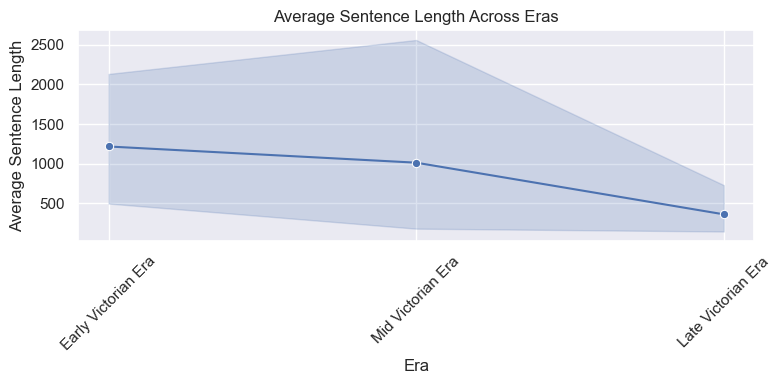

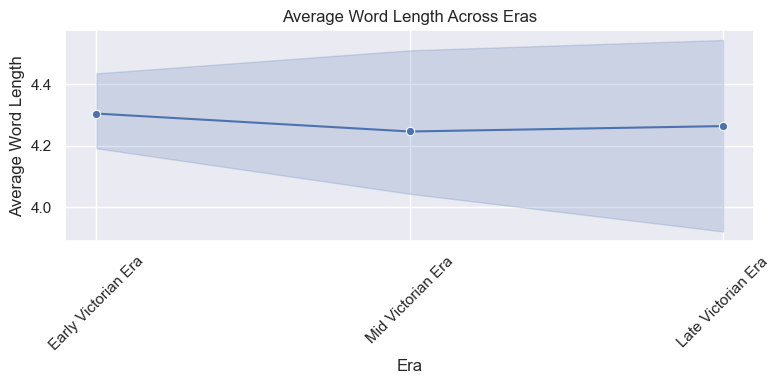

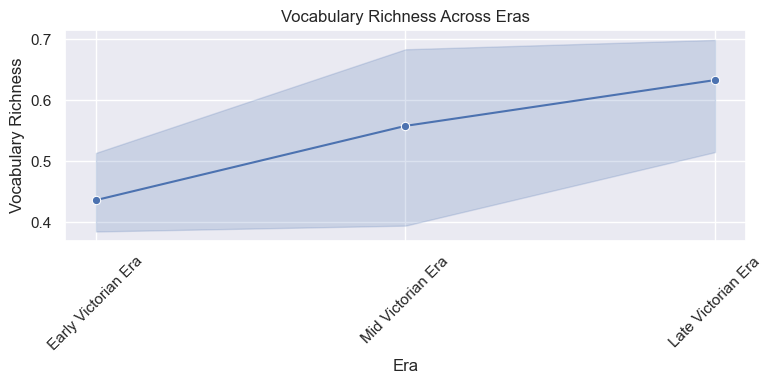

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="darkgrid")

# Visualize Average Sentence Length
plt.figure(figsize=(8, 4))
sns.lineplot(x='Era', y='Avg Sentence Length', data=avg_sentence_length_df, marker='o')
plt.title('Average Sentence Length Across Eras')
plt.xlabel('Era')
plt.ylabel('Average Sentence Length')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Visualize Average Word Length
plt.figure(figsize=(8, 4))
sns.lineplot(x='Era', y='Avg Word Length', data=avg_word_length_df, marker='o')
plt.title('Average Word Length Across Eras')
plt.xlabel('Era')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Visualize Vocabulary Richness
plt.figure(figsize=(8, 4))
sns.lineplot(x='Era', y='Vocabulary Richness', data=vocabulary_richness_df, marker='o')
plt.title('Vocabulary Richness Across Eras')
plt.xlabel('Era')
plt.ylabel('Vocabulary Richness')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
